# Blockchain Demo

* Source from https://github.com/dvf/blockchain.git

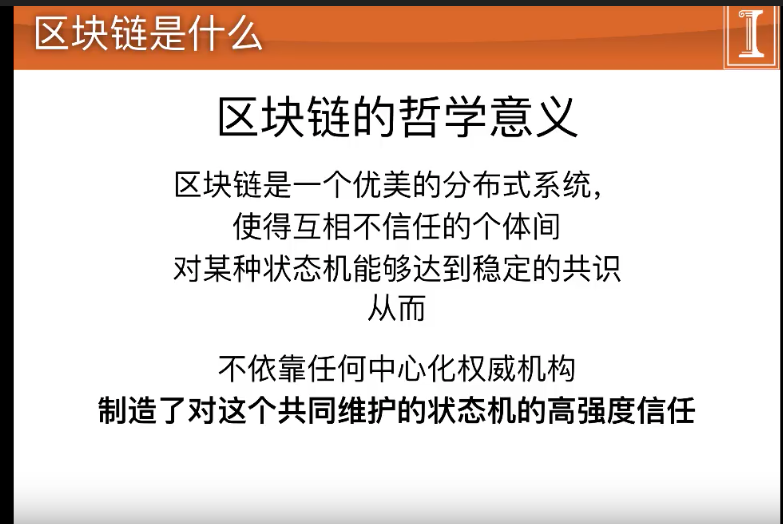

In [21]:
from IPython.display import Image

path = './chart/bc_s.png'
Image(filename=path, unconfined=True)

## Create a blockchain 

In [22]:
from blockchain import Blockchain, Ent, PyCryptoSim
import pdb


blockchain = Blockchain(proof=10)

last_block = blockchain.last_block
last_proof = last_block['proof']

print(f'last block is {last_block}')
print(f'last proof is {last_proof}')
print(f'transaction is {blockchain.transaction(-1)}')

last block is {'index': 1, 'timestamp': 1516561550.1262028, 'transactions': [], 'proof': 10, 'previous_hash': '1'}
last proof is 10
transaction is N/A


## Mine proof of work

* A proof of work is a piece of data which is difficult (costly, time-consuming) to produce but easy for others to verify and which satisfies certain requirements. Producing a proof of work can be a random process with low probability so that a lot of trial and error is required on average before a valid proof of work is generated. Bitcoin uses the Hashcash proof of work system. 
https://en.bitcoin.it/wiki/Proof_of_work

* Proof-of-work is essentially one-CPU-one-vote. The

* Caven iterates through the proof space to find the right proof


In [23]:
# A proof method Blockchain.valid_proof(last_proof, proof) is known to all
# Now let's mine by iterating over the whole search space

proof = blockchain.proof_of_work(last_proof)
print(f'proof is {proof}')

# Now every one could validate if the proof is valid
print(f'proof {proof} is valid'.format(
    Blockchain.valid_proof(last_proof=last_proof, proof=proof, mining_rate=blockchain.mining_rate)
))


proof is 124676
proof 124676 is valid


## Now award Caven something.
* Let's forge a new block and then append it to the blockchain

* However, we need to eat some vegetable of cryptology first.



In [24]:
simulator = PyCryptoSim()
(pk, sk) = simulator.key_pair()
print(f"secrect key is {sk}; public key is {pk}")
msg='Hello world'
commit = simulator.commit(private=sk, msg=msg)
print(f"commit is {commit}")
print(f"message is {msg}")
# it is infeasible to guess but verify is very cheap!
verify = simulator.verify(public=pk, msg=msg, commit=commit)
print(f"could verify: {verify}")

# Try to hack something
verify_fake = simulator.verify(public=pk, msg=msg, commit="hacker could guess")
print(f"could verify fake: {verify_fake}")



secrect key is d9b494169f3c4bc5a278937215cca453; public key is e82065e9a45047989fbbcf716c998aa3
commit is 04c08440befb17ce64b244d3874f5b52cea1a0afbc1efbe2e2924bd255471d75
message is Hello world
could verify: True
could verify fake: False


In [25]:
from uuid import uuid4
# Generate a globally unique address for this node
# Address is generated with a private key and is supposed to be a single-use token
# https://en.bitcoin.it/wiki/Address
# an address map to a private key which is a 256-bit or 64-character number in bitcoin
# https://en.bitcoin.it/wiki/Private_key
# I didn't find a Python package that is easy to use and wrote a simulator instead
(pk, sk) = simulator.key_pair()
blockchain.new_transaction(
    sender="from mine",
    recipient=pk,
    amount=1,
)


previous_hash = blockchain.hash(last_block)
copy_bc = blockchain.clone()
copy_bc2 = blockchain.clone()
block = blockchain.new_block(proof, previous_hash)

print(f"Hash of last block is {previous_hash}")
print(f'last block is {blockchain.last_block}')

# suppose someone didn't find the proof but claims that he/she mined
block = copy_bc.new_block(100, previous_hash)
Cz = Ent(name='Chenzhang')


print(f"{Cz.validate_blockchain(blockchain)}")
print(f"{Cz.validate_blockchain(copy_bc)} with wrong solution")

# Someone steals the proof and makes another block
(pk2, sk2) = simulator.key_pair()
copy_bc2.new_transaction(
    sender="from mine",
    recipient=pk2,
    amount=1,
)




Hash of last block is 444be9d6762a1565b1f8c02c079571a3b039a13807b2f32b25161d5f07826e57
last block is {'index': 2, 'timestamp': 1516561550.466914, 'transactions': [{'sender': 'from mine', 'recipient': 'fcd07aae15f245f4b078d4426db6acdf', 'amount': 1}], 'proof': 124676, 'previous_hash': '444be9d6762a1565b1f8c02c079571a3b039a13807b2f32b25161d5f07826e57'}
Chenzhang accepts the blockchain
Chenzhang rejects the blockchain with wrong solution


2

## If one modifies one transaction, it needs to modify the whole chain to the head of the chain



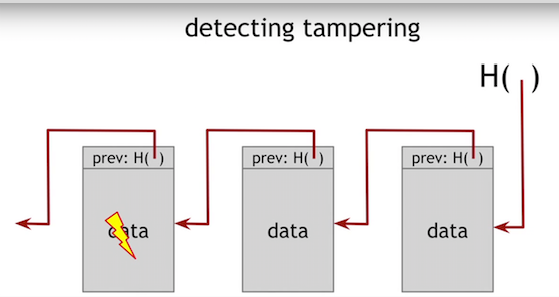

In [26]:
# If no one keeps the private key, this coin is lost
path = './chart/tamper.png'
Image(filename=path, unconfined=True)

### What if someone finds the solution at the same time? 

* Longer chain wins. We will mention later.

### What if someone changes the last block? 
* Different from copies in most users and will be discarded.

### What if everyone claims an address and claim that address is the receiver? 
* 51% problem : https://www.investopedia.com/terms/1/51-attack.asp
The attackers would be able to prevent new transactions from gaining confirmations, allowing them to halt payments between some or all users. They would also be able to reverse transactions that were completed while they were in control of the network, meaning they could double-spend coins.


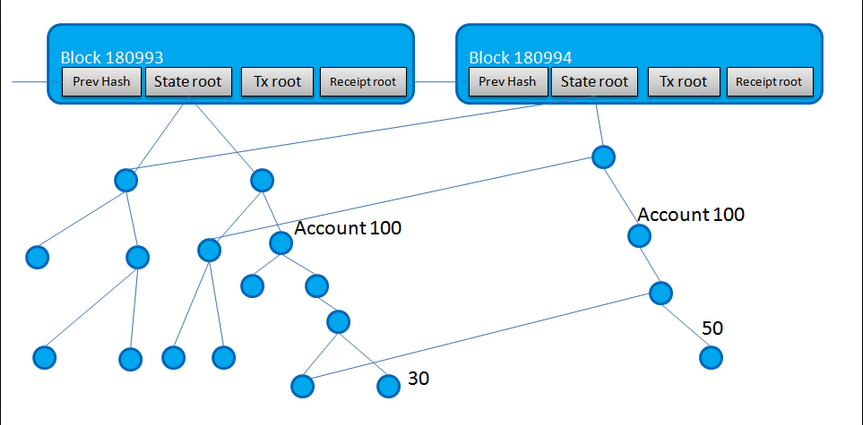

In [27]:
path = './chart/merkle.png'
Image(filename=path, unconfined=True)

## Let's wrap up the code of mining

In [28]:
# Now let's go up one level
Jq = Ent(name='Junqi')
blockchain = Cz.mine(blockchain)
# Let's just assume this is confirmed by > 51% of the nodes
blockchain = Jq.mine(blockchain)
print(f"blockchain looks now like: ")
blockchain.print_chain()
print(f"{Cz.validate_blockchain(blockchain)} for real")


blockchain looks now like: 
	{'index': 1, 'timestamp': 1516561550.1262028, 'transactions': [], 'proof': 10, 'previous_hash': '1'}
	{'index': 2, 'timestamp': 1516561550.466914, 'transactions': [{'sender': 'from mine', 'recipient': 'fcd07aae15f245f4b078d4426db6acdf', 'amount': 1}], 'proof': 124676, 'previous_hash': '444be9d6762a1565b1f8c02c079571a3b039a13807b2f32b25161d5f07826e57'}
	{'index': 3, 'timestamp': 1516561550.606304, 'transactions': [{'sender': 'from mine', 'recipient': 'dd4c1c45e9694f07892e2520da3bbbe8', 'amount': 1}], 'proof': 46107, 'previous_hash': '0a0e51b04e8d565089dc72a75bb9945db27583443de064e82cca42a3ff6eb222'}
	{'index': 4, 'timestamp': 1516561550.688468, 'transactions': [{'sender': 'from mine', 'recipient': '48b3293bb25b4722a6c9004ce9229427', 'amount': 1}], 'proof': 35764, 'previous_hash': 'b7b1333e388cad6151d41fc0e4a668900f62aa3e4a20c3fd7579ad8e56623c8e'}
Chenzhang accepts the blockchain for real


## Suppose Junqi now wants to fake a transaction

In [29]:
# Validate
faked = Jq.some_fake(blockchain)
print(f"{Cz.validate_blockchain(blockchain)} for real")
print(f"{Cz.validate_blockchain(faked)} for fake")


Chenzhang accepts the blockchain for real
Chenzhang rejects the blockchain for fake


## Now let's check the balances.
It is tricky: https://bitcoin.stackexchange.com/questions/13069/how-does-the-network-know-my-current-balance
* we get all the addresses associated with the private keys
* we look up for the balance for the addresses

In [30]:
# let's check all the key pairs Chenzhang has
for ent in Cz, Jq:
    print(f"{ent.name} has {ent.keys}")
    

for ent in Cz, Jq:
    total, balance = ent.balance(blockchain, verbose=True)
    print(f"{ent.name} has {total} in total")
    print(balance)


Chenzhang has {'dd4c1c45e9694f07892e2520da3bbbe8': '8293cdfc71ba4f0baa400240fdea8f4a'}
Junqi has {'48b3293bb25b4722a6c9004ce9229427': 'dddc108f6a804eaab83316aa1bd87bef', '20ee0f81dafe43ecb479b56d8b1e17ff': '2307289bfedb45c0bda9f29770615e3c'}
Chenzhang has 1 in total
{'dd4c1c45e9694f07892e2520da3bbbe8': 1}
Junqi has 1 in total
{'48b3293bb25b4722a6c9004ce9229427': 1, '20ee0f81dafe43ecb479b56d8b1e17ff': 0}


In [31]:
# Now let's test the transaction
amount = 100
try:
    blockchain = Jq.gives(blockchain, recepient=Cz, amount=100)
except Exception as e:
    print(f"{amount} of transfer failed because {e}\n\n")
    
blockchain = Jq.gives(blockchain, recepient=Cz)
blockchain.print_chain()
print(f"{Cz.validate_blockchain(blockchain)}")
    
for ent in Cz, Jq:
    total, balance = ent.balance(blockchain, verbose=True)
    print(f"\n{ent.name} has {total} in total")
    print(balance)

100 of transfer failed because Junqi: insufficient balance


	{'index': 1, 'timestamp': 1516561550.1262028, 'transactions': [], 'proof': 10, 'previous_hash': '1'}
	{'index': 2, 'timestamp': 1516561550.466914, 'transactions': [{'sender': 'from mine', 'recipient': 'fcd07aae15f245f4b078d4426db6acdf', 'amount': 1}], 'proof': 124676, 'previous_hash': '444be9d6762a1565b1f8c02c079571a3b039a13807b2f32b25161d5f07826e57'}
	{'index': 3, 'timestamp': 1516561550.606304, 'transactions': [{'sender': 'from mine', 'recipient': 'dd4c1c45e9694f07892e2520da3bbbe8', 'amount': 1}], 'proof': 46107, 'previous_hash': '0a0e51b04e8d565089dc72a75bb9945db27583443de064e82cca42a3ff6eb222'}
	{'index': 4, 'timestamp': 1516561550.688468, 'transactions': [{'sender': 'from mine', 'recipient': '48b3293bb25b4722a6c9004ce9229427', 'amount': 1}], 'proof': 35764, 'previous_hash': 'b7b1333e388cad6151d41fc0e4a668900f62aa3e4a20c3fd7579ad8e56623c8e'}
	{'index': 5, 'timestamp': 1516561550.721817, 'transactions': [{'sender': '48b32

## make it a bit more complex

In [32]:
print("Do some mining")
for i in range(5):
    blockchain = Cz.mine(blockchain)
    # Let's just assume this is confirmed by > 51% of the nodes
    blockchain = Jq.mine(blockchain)
    
for ent in Cz, Jq:
    total, balance = ent.balance(blockchain, verbose=True)
    print(f"{ent.name} has {total} in total")
    print(balance)
    
print("\n\nDo some transactions")

blockchain = Jq.gives(blockchain, recepient=Cz, amount=3)
for ent in Cz, Jq:
    total, balance = ent.balance(blockchain, verbose=True)
    print(f"{ent.name} has {total} in total")
    print(balance)
    
print(f"blockchain looks now like: ")
blockchain.print_chain()

Do some mining
Chenzhang has 7 in total
{'dd4c1c45e9694f07892e2520da3bbbe8': 1, '6368401e27f24e1880f032f2a15a7540': 1, 'd8c12136d98f45e3b4a9f84f49de458a': 1, 'ed92def80e0c4fe3bf573e602daa7d60': 1, 'd94d07252db548d181f2b06b987a26de': 1, '9912de9e1a0040969fbb568380908cdd': 1, 'ad71b6bbe0b24429afa832cb064ff367': 1}
Junqi has 5 in total
{'48b3293bb25b4722a6c9004ce9229427': 0, '20ee0f81dafe43ecb479b56d8b1e17ff': 0, '16d244e4867c4055a208d476ebbdb4c2': 1, '7f3a1522b85243ee9e00624c88396f5d': 1, '336de80a6f8f4b11bef9c8964d8d04ab': 1, 'c8d14732aab94252962924354183a42c': 1, '4c2a002636a4433eb527fab800e65441': 1}


Do some transactions
Chenzhang has 10 in total
{'dd4c1c45e9694f07892e2520da3bbbe8': 1, '6368401e27f24e1880f032f2a15a7540': 1, 'd8c12136d98f45e3b4a9f84f49de458a': 1, 'ed92def80e0c4fe3bf573e602daa7d60': 1, 'd94d07252db548d181f2b06b987a26de': 1, '9912de9e1a0040969fbb568380908cdd': 1, 'ad71b6bbe0b24429afa832cb064ff367': 1, '9b55ffc4a6a947b0a3a2e81c9d04037f': 1, 'f1da6ff7150344d6ab669f9321cd

## We could control the mining rate by adjusting the search space

* to make things simple, let's use a static mining rate
* Exponential change

In [33]:
slow_bc = Blockchain(proof=10, mining_rate=6)
Caven = Ent(name='Caven')
for i in range(5):
    slow_bc = Caven.mine(slow_bc)
    
print(f"Mining cost of previous: slow is {blockchain.mining_cost} : {slow_bc.mining_cost}")

Mining cost of previous: slow is 24093.0 : 199038.0


## Resolving the conflicts

* In reality a chain if often discarded if a chain of two blocks longer is discovered

In [34]:
print(f"{Cz.validate_blockchain(blockchain)}")
import random

chains = []
ents = [Cz, Jq,]
for ent in ents:
    chains.append(ent.mine(blockchain))

valid, invalid = Blockchain.valid_vs_invalid(chains)

print(f"valid chains {len(valid)}; \ninvalid chains {len(invalid)}")

chains.append(Cz.mine(Cz.mine(blockchain)))
valid, invalid = Blockchain.valid_vs_invalid(chains)

print(f"after some time\nvalid chains {len(valid)}; \ninvalid chains {len(invalid)}")



Chenzhang accepts the blockchain
valid chains 2; 
invalid chains 0
after some time
valid chains 1; 
invalid chains 2


# Summary

* https://bitcoin.org/bitcoin.pdf

## Transactions

### Problem.1 Signing the transactions

* using public key + secret(private) key

### Problem.2 Double spending

* transactions are publicly announced

* created a system for participants to agree on a single history

* distributed timestamp server by Proof of Work

## What actually happens on network

* New transactions are broadcast to all nodes.

* Each node collects new transactions into a block.  

* Each node works on finding a difficult proof-of-work for its block.

* When a node finds a proof-of-work, it broadcasts the block to all nodes.

* Nodes accept the block only if all transactions in it are valid and not already spent.

* Nodes express their acceptance of the block by working on creating the next block in the chain, using the hash of the accepted block as the previous hash.

### Incentive

* The first transaction in a block is a transaction that starts a new coin owned by the creator of the block.

* Encourage the nodes to stay honest

### Simplied Payment Verification

* A user only needs to keep a copy of the block headers of the longest proof-of-work chain, which he can get by querying network nodes until he's convinced he has the longest chain.

* As such, the verification is reliable as long as honest nodes control the network, but is more vulnerable if the network is overpowered by an attacker

### Privacy

* Using a single-use token as the address

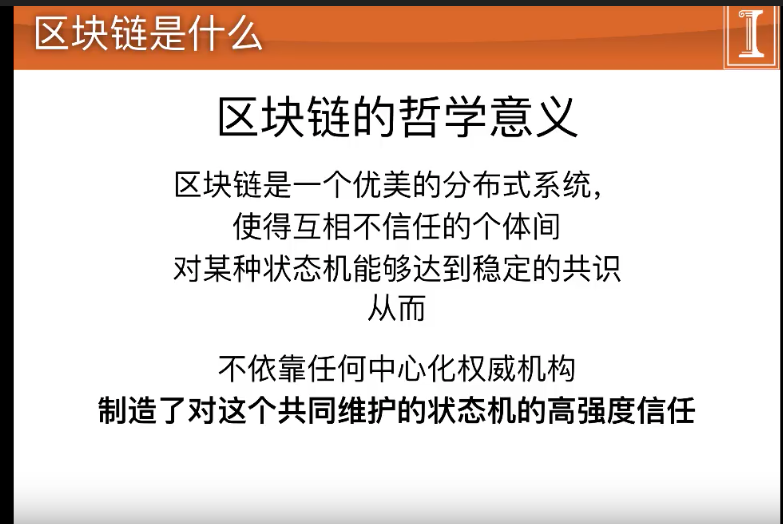

In [35]:
from IPython.display import Image

path = './chart/bc_s.png'
Image(filename=path, unconfined=True)

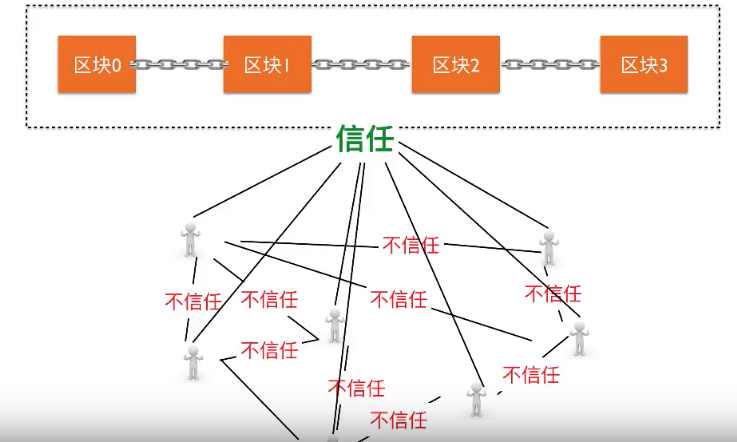

In [36]:
path = './chart/trust.png'
Image(filename=path, unconfined=True)

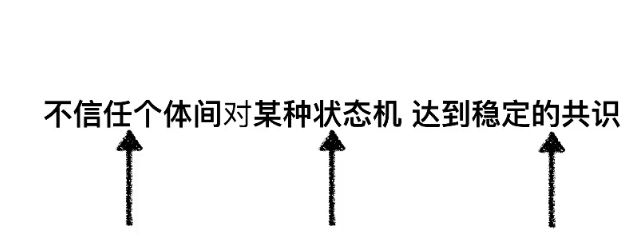

In [37]:
path = './chart/frame.png'
Image(filename=path, unconfined=True)

# Futures

* Crypto-currency 

* ??


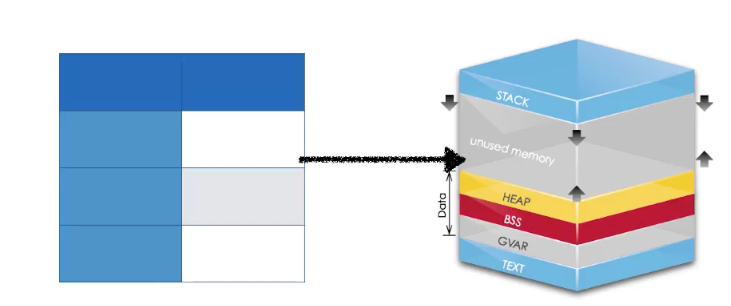

In [38]:
path = './chart/pos.png'
Image(filename=path, unconfined=True)


## Programmable

### Map

* Table => Status of a Program

* Transactions => Operations

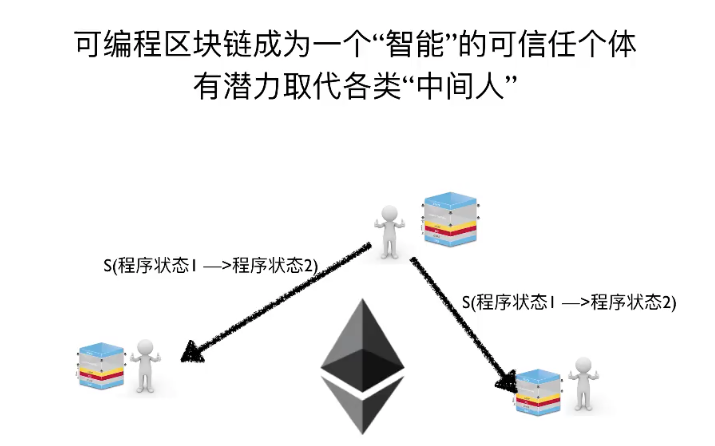

In [39]:
path = './chart/intermediate.png'
Image(filename=path, unconfined=True)


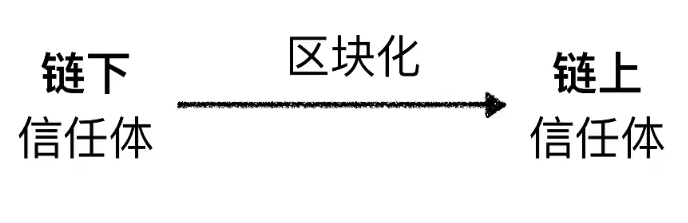

In [40]:
path = './chart/trans.png'
Image(filename=path, unconfined=True)

### 讨论
* 区块链电影票？？
* 保险？？
* 拍卖？？
* 博彩 ?
* Options？
* Voting?

#### 角度

* Entity?
* Cost?
* Programmable?